<a href="https://colab.research.google.com/github/dbtrago/IA_2025-1/blob/main/PEC1_ValeriaManjarrez_DanielBuitrago_AlejandroAlzate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes**


*   Valeria Manjarrez Garzon
*   Daniel Esteban Buitrago Lozano
*   Alejandro Antonio Alzate Rodriguez



In [13]:
!wget -O dataset_diabetes.zip 'https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip'
!unzip dataset_diabetes.zip

--2025-03-15 19:50:07--  https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset_diabetes.zip’

dataset_diabetes.zi     [   <=>              ]   3.02M  5.82MB/s    in 0.5s    

2025-03-15 19:50:08 (5.82 MB/s) - ‘dataset_diabetes.zip’ saved [3170254]

Archive:  dataset_diabetes.zip
  inflating: diabetic_data.csv       
  inflating: IDS_mapping.csv         


# **Librerias**

En esta sección se definen todos los imports que tendremos en el documento.

In [14]:
import pandas as pd

# **Informacion basica del data set**

In [16]:
df = pd.read_csv('diabetic_data.csv')
df.info # se obtiene la meta informacion del data set
df.shape # Se obtiene las dimensiones del data set
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# **PEC - PUNTO 1 : DESCRIPCION DEL DATA SET**

El dataset "Diabetes 130-US hospitals for years 1999-2008" proviene del repositorio de la Universidad de California en Irvine (UCI) y contiene información clínica sobre 101.766 registros de pacientes con diabetes hospitalizados en 130 hospitales de EE.UU. entre 1999 y 2008. Su finalidad es proporcionar datos para el análisis de readmisión hospitalaria, identificación de patrones en el tratamiento de la diabetes y estudios relacionados con el cuidado de la salud.

El dataset cuenta con 50 variables, de las cuales 13 son numéricas (como la edad y el tiempo de hospitalización) y 37 son categóricas (como el género, la raza, los diagnósticos y los medicamentos administrados).

Se muestra el diccionario de datos con la informacion de un registro de pacientes hospitalizados con diabetes

In [ ]:
data_dict = {
    "encounter_id" :
      {"description" : "id unico del encuentro hospitalario" , "tipo" : "Entero"},
    "patient_nbr" :
      {"description" : "ID unico del paciente", "tipo" : "Entero"},
    "age" :
      {"description" : "Rango de edad del paciente", "tipo" :"Polinomial"},
    "time_in_hospital" :
      {"description" : "Días de hospitalización", "tipo" : "Entero"},
    "num_lab__procedures" :
      {"description" : "Numero de procedimientos de laboratorio", "tipo" : "Entero"},
    "readmitted" :
      {"description" : "Readmisión menos de 30 días, más de 30 días, o no" , "tipo" : "Polinomial"}
}

Cantidad de Variables categoricas y númericas

In [ ]:
num_vars = df.select_dtypes(include=['int64', 'float64']).shape[1]

# Contar las variables categóricas (object y category)
cat_vars = df.select_dtypes(include=['object', 'category']).shape[1]

print(f"Cantidad de variables numéricas: {num_vars}")
print(f"Cantidad de variables categóricas: {cat_vars}")

Cantidad de variables numéricas: 13
Cantidad de variables categóricas: 37


**La variable Label es remitted.**

#**PEC - PUNTO 2 : DICCIONARIO DE DATOS**#

In [ ]:
# Cargar el dataset
df = pd.read_csv("diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 200)  # Ajusta el ancho de la tabla en la pantalla
pd.set_option('display.colheader_justify', 'center')  # Alinea los títulos de las columnas
pd.set_option('display.float_format', '{:.2f}'.format)  # Formato de decimales


# Crear un diccionario con la información clave de cada columna
data_dict = {
    "Nombre de la Variable": df.columns,
    "Rol (Predictor/Label)": ["Predictor" if col != "readmitted" else "Label" for col in df.columns],
   'Tipo Categórica (Ordinal, Nominal) o Numérica (Entero, Real)': ['Numérica' if df[col].dtype in ['int64', 'float64'] else 'Categórica' for col in df.columns],
    "Datos Vacíos (S/N)": ["S" if df[col].isnull().any() else "N" for col in df.columns],
    "Valor Mínimo": [df[col].min() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Valor Máximo": [df[col].max() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media por Clase": ["N/A" for col in df.columns],
    "Moda y Moda por Clase": ["N/A" for col in df.columns],
    "Valores de la Variable Categórica con su Respectiva Frecuencia": ["N/A" for col in df.columns]
}

df_data_dict = pd.DataFrame(data_dict)

# Mostrar tabla
print(df_data_dict)

     Nombre de la Variable   Rol (Predictor/Label) Tipo Categórica (Ordinal, Nominal) o Numérica (Entero, Real) Datos Vacíos (S/N) Valor Mínimo Valor Máximo    Media     Media por Clase  \
0               encounter_id        Predictor                            Numérica                                        N             12522      443867222  165201645.62        N/A        
1                patient_nbr        Predictor                            Numérica                                        N               135      189502619   54330400.69        N/A        
2                       race        Predictor                          Categórica                                        N               N/A            N/A           N/A        N/A        
3                     gender        Predictor                          Categórica                                        N               N/A            N/A           N/A        N/A        
4                        age        Predictor          

In [ ]:
df_dict = pd.DataFrame.from_dict(data_dict, orient="index")
df_dict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Nombre de la Variable,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Rol (Predictor/Label),Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Predictor,Label
"Tipo Categórica (Ordinal, Nominal) o Numérica (Entero, Real)",Numérica,Numérica,Categórica,Categórica,Categórica,Categórica,Numérica,Numérica,Numérica,Numérica,Categórica,Categórica,Numérica,Numérica,Numérica,Numérica,Numérica,Numérica,Categórica,Categórica,Categórica,Numérica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica,Categórica
Datos Vacíos (S/N),N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
Valor Mínimo,12522,135,N/A,N/A,N/A,N/A,1,1,1,1,N/A,N/A,1,0,1,0,0,0,N/A,N/A,N/A,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Valor Máximo,443867222,189502619,N/A,N/A,N/A,N/A,8,28,25,14,N/A,N/A,132,6,81,42,76,21,N/A,N/A,N/A,16,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Media,165201645.62,54330400.69,N/A,N/A,N/A,N/A,2.02,3.72,5.75,4.40,N/A,N/A,43.10,1.34,16.02,0.37,0.20,0.64,N/A,N/A,N/A,7.42,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Media por Clase,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Moda y Moda por Clase,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Valores de la Variable Categórica con su Respectiva Frecuencia,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


Calcular la correlacion de Pearson

Graficamos la matriz de correlacion

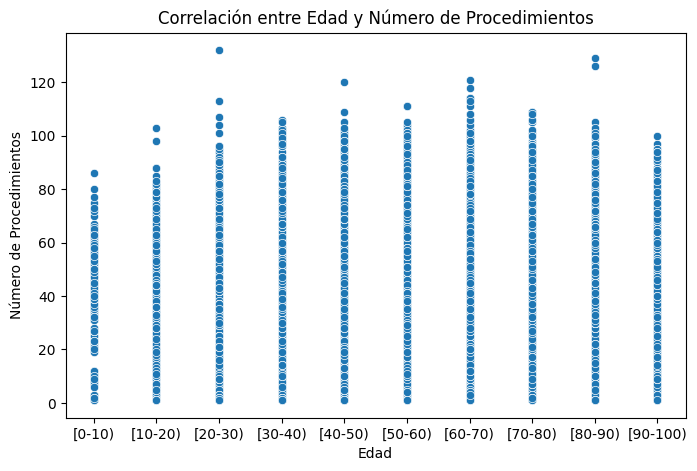

In [ ]:
# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='num_lab_procedures')
plt.title('Correlación entre Edad y Número de Procedimientos')
plt.xlabel('Edad')
plt.ylabel('Número de Procedimientos')
plt.show()


#  **PEC - PUNTO 3 : COLUMNAS CON MAS DEL 30% DE VALORES FALTANTES**

 Columnas con más del 30% de valores faltantes

In [ ]:
import pandas as pd
df = pd.read_csv('diabetic_data.csv')


missing_percent = df.isnull().sum() / len(df) * 100

columns_with_missing = missing_percent[missing_percent > 30]

print(columns_with_missing)


max_glu_serum   94.75
A1Cresult       83.28
dtype: float64


# **PEC - PUNTO 4 : MEJORA  EN LA CALIDAD DE DATOS**

Para mejorar la calidad del dataset, se realizará una limpieza de datos para evitar errores en los resultados

**1.Limpieza de datos:**
Se eliminan las columnas que tengas mas del 30% de los valores nulos para evitar que haya poca informacion en el analisis. También se eliminan las columnas que no contribuyan al modelo  

In [ ]:
#cargar el dataset
df = pd.read_csv('diabetic_data.csv')

#1. eliminar columnas faltantes y nulas
thresh = 0.7 * len(df) #30% de valores nulos como maximo
df = df.dropna(thresh=thresh, axis=1)

**2. Manejo de valores nulos:**
Para las variables numericas los valores nulos se reemplazaran por la media de la columna, y para las variables categoricas los valores nulos se reemplazaran por la moda de la columna.

In [ ]:
#2. Reemplazo de valores nulos
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col].fillna(df[col].mean(), inplace=True)
  elif df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-17-2b0102632917>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-17-2b0102632917>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-17-2b0102632917>:6: FutureWarning: A value is trying to be set on a copy of a 

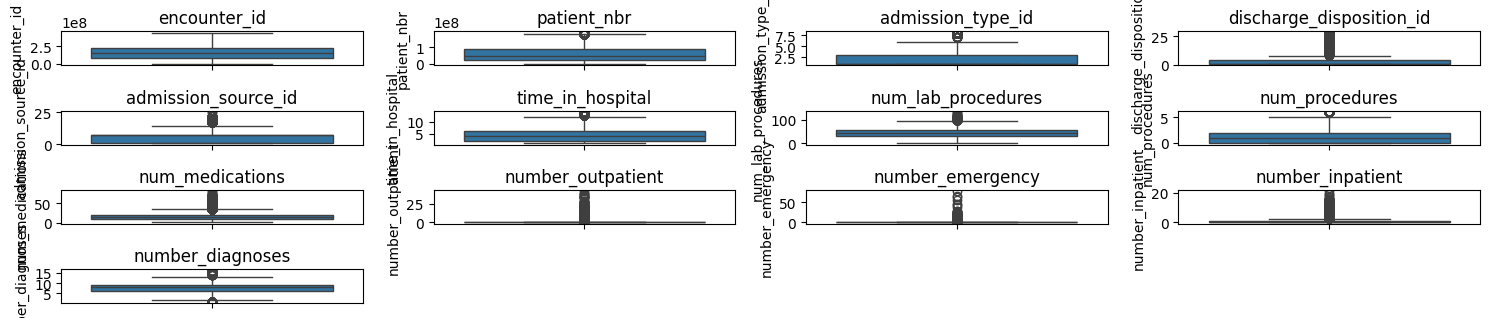

In [ ]:
# 3. Detección de valores atípicos con boxplot
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot( 10, 4, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# **PEC - PUNTO 5 : GRAFICOS**

Se comienza con toda la actitud

Cargar el dataset a excel

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
#import pandas as pd

# Carga el dataset desde un archivo CSV
#df = pd.read_csv('diabetic_data.csv')

# Crea un objeto ExcelWriter para escribir el DataFrame a un archivo Excel
#with pd.ExcelWriter('diabetic_data_formatted.xlsx', engine='xlsxwriter') as writer:
    # Escribe el DataFrame a la hoja de Excel
   # df.to_excel(writer, sheet_name='Data', index=False)

    # Obtén el workbook y la hoja de trabajo para aplicar formato
    #workbook  = writer.book
    #worksheet = writer.sheets['Data']

    # Ajusta el ancho de las columnas basándote en el contenido
    #for i, col in enumerate(df.columns):
        # Ajusta el ancho de la columna basándose en la longitud máxima del contenido de la columna
       # max_len = max(df[col].astype(str).map(len).max(), len(col)) + 2  # Suma 2 para espacio extra
        #worksheet.set_column(i, i, max_len)


In [ ]:
df.to_excel('diabetic_data_clean.xlsx', index=False)

In [ ]:
from google.colab import files
files.download("diabetic_data_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>